### Initial Setup

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#setting up path variables
proj_path = r'/home/nevesfernandes/20250701 Instacart Basket Analysis/'
data_path = r'/home/nevesfernandes/20250701 Instacart Basket Analysis/2 Data/'

In [3]:
#importing most recent pickle file into working dataframe
df_orders_products_merged = pd.read_pickle(os.path.join(data_path, '2 Prepared Data', 'orders_products_labeled_v2.pkl'))

### Bar Charts

<Axes: xlabel='orders_day_of_week'>

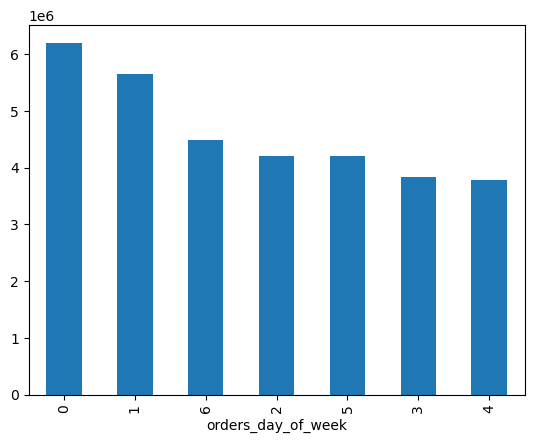

In [4]:
#plotting a bar chart
df_orders_products_merged['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

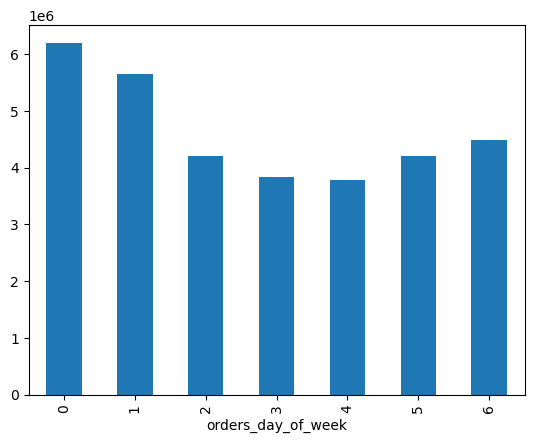

In [5]:
#new bar chart without sorting by values, keeping the sort by the index
df_orders_products_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

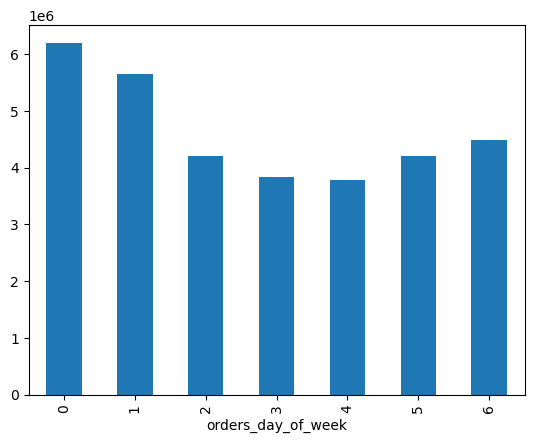

In [6]:
#assigning plot to an object bar
bar_chart = df_orders_products_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()
bar_chart.figure.savefig(os.path.join(proj_path, '4 Analysis','3 Visualizations', 'bar_orders_dow.png'))

### Histograms

<Axes: ylabel='Frequency'>

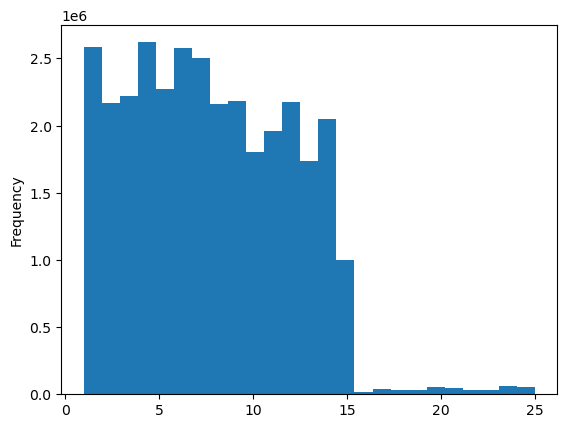

In [7]:
#histogram of prices
df_orders_products_merged['prices'].plot.hist(bins = 25)

I didn't get the result mentioned in the exercise because I already cleaned up the outliers with values 14900.00 and 99999.00 in prices column. While I followed the explanation of the exercise, I'm not applying it here because I corrected already products dataset.

<Axes: ylabel='Frequency'>

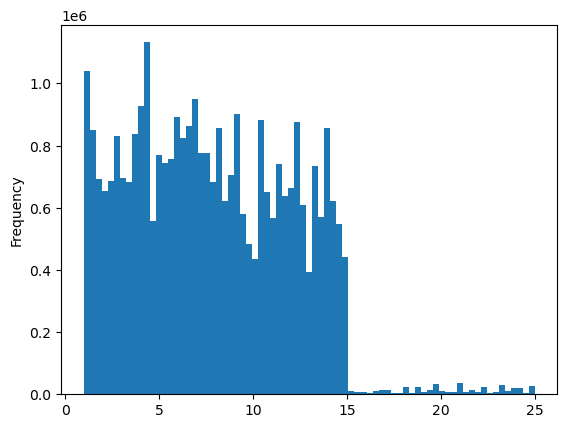

In [8]:
#histogram of prices with bigger granularity
df_orders_products_merged['prices'].plot.hist(bins = 75)

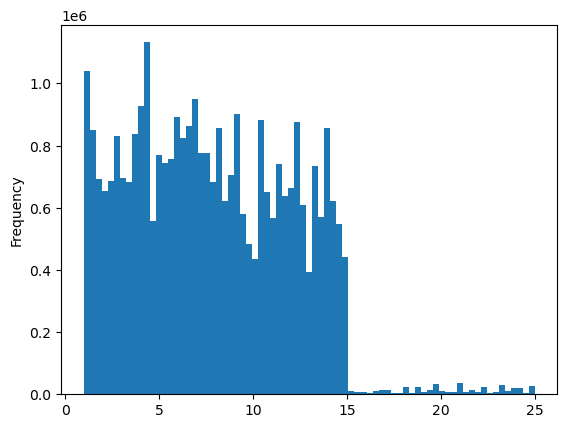

In [9]:
#assigning plot to a variable and storing it
hist = df_orders_products_merged['prices'].plot.hist(bins = 75)
hist.figure.savefig(os.path.join(proj_path, '4 Analysis','3 Visualizations', 'histogram_prices.png'))

### Line Charts

In [10]:
#starting by creating random slices (70/30 percent)
np.random.seed(4)
dev = np.random.rand(len(df_orders_products_merged)) <= 0.7

In [11]:
#store each slice in its own dataframe - I'm currently commenting the df_big line to see if I save memory

df_big = df_orders_products_merged[dev]
df_small = df_orders_products_merged[~dev]

In [12]:
#creating a new dataframe with only the fields we need
df_line_plot = df_small[['orders_day_of_week','prices']]

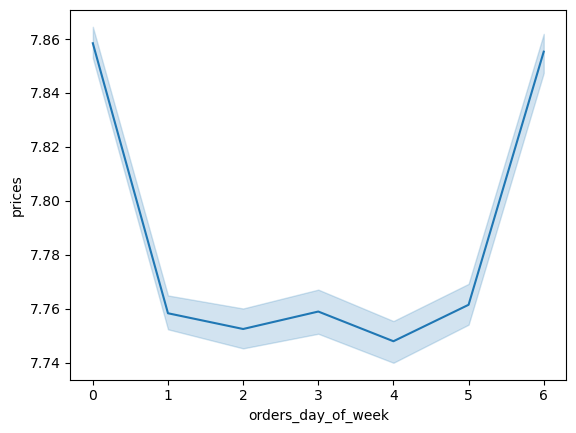

In [13]:
#creating line plot, and assigning it to a variable
line = sns.lineplot(data = df_line_plot, x = 'orders_day_of_week',y = 'prices')

In [14]:
line.figure.savefig(os.path.join(proj_path, '4 Analysis','3 Visualizations', 'line_chart_prices_per_dow.png'))

In [15]:
#saving to pickle files the 30% and 70% slices, to be able to merge dataframes in the task ahead
df_small.to_pickle(os.path.join(data_path, '2 Prepared Data', 'orders_products_sliced_30pc.pkl'))
df_big.to_pickle(os.path.join(data_path, '2 Prepared Data', 'orders_products_sliced_70pc.pkl'))